In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
#%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
import time

In [2]:
# Load the data
data= pd.read_csv('D:/University/Study Material/8th Semester/Intelligence Systems/Theory/Assignments/Assignment_5/HR_comma_sep.csv')

In [3]:
# Find the shape
data.shape

(14999, 10)

In [4]:
# Display the top 5 rows.
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Find the data types of columns
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
# Find the basic statistics
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Find the null values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

## Feature Engineering

In [8]:
df=data.copy()

In [9]:
df['satisfaction_level_type']=''
df.loc[df['satisfaction_level'] >= 0.5,'satisfaction_level_type']='High'
df.loc[df['satisfaction_level'] < 0.5,'satisfaction_level_type']='Low'

In [10]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low


In [11]:
df['employee_type']=''
df.loc[df['number_project']==2,'employee_type']='Unburdened'
df.loc[(df['number_project']>2) & (df['number_project']<=5),'employee_type']='Satisfactory'
df.loc[df['number_project']>5,'employee_type']='Burdened'

In [12]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,Unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,Burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,Satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,Unburdened


In [13]:
df.drop(['satisfaction_level','number_project'], axis=1,inplace=True)

In [14]:
df.head(5)

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.53,157,3,0,1,0,sales,low,Low,Unburdened
1,0.86,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.88,272,4,0,1,0,sales,medium,Low,Burdened
3,0.87,223,5,0,1,0,sales,low,High,Satisfactory
4,0.52,159,3,0,1,0,sales,low,Low,Unburdened


## ML Algorithms

In [15]:
# Initialize lists to store results
times = []
accuracies = []

In [16]:
# Write code here
df_copy=pd.get_dummies(df, columns=['dept', 'salary', 'satisfaction_level_type', 'employee_type'])

In [17]:
df_copy.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_Unburdened
0,0.53,157,3,0,1,0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,0.86,262,6,0,1,0,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
2,0.88,272,4,0,1,0,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
3,0.87,223,5,0,1,0,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,0.52,159,3,0,1,0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True


In [18]:
X=df_copy.drop(['left'], axis=1)
Y=df_copy[['left']]

In [19]:
X.head(5)

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_Unburdened
0,0.53,157,3,0,0,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,0.86,262,6,0,0,False,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False
2,0.88,272,4,0,0,False,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
3,0.87,223,5,0,0,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,0.52,159,3,0,0,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True


In [20]:
Y.head(5)

,left
0,1
1,1
2,1
3,1
4,1


In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30, random_state=100,shuffle=True)

In [22]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(10499, 23) (10499, 1)
(4500, 23) (4500, 1)


### SVM

In [23]:
# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
# Grid search with SVM and hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5)

start_time = time.time()
svm_grid_search.fit(x_train_scaled, y_train)
end_time = time.time()
times.append(round(end_time - start_time,2))

# Get the best model and predictions
best_svm_model = svm_grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(x_test_scaled)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWar

In [25]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print(f"Accuracy: {accuracy_svm}")
accuracies.append(round(accuracy_svm*100,2))

# F1-Score 
f1_svm = f1_score(y_test, y_pred_svm)
print("F1-Score :", f1_svm)

# Recall
recall_svm = recall_score(y_test, y_pred_svm)
print("Recall:", recall_svm)

# Recall 
precision_svm = precision_score(y_test, y_pred_svm)
print("Precision:", precision_svm)

Accuracy: 0.9726666666666667
F1-Score : 0.9441163107678329
Recall: 0.9454049135577798
Precision: 0.9428312159709619


In [26]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3401
           1       0.94      0.95      0.94      1099

    accuracy                           0.97      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [27]:
label_names = ['Left','Stayed']
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[3338,   63],
       [  60, 1039]], dtype=int64)

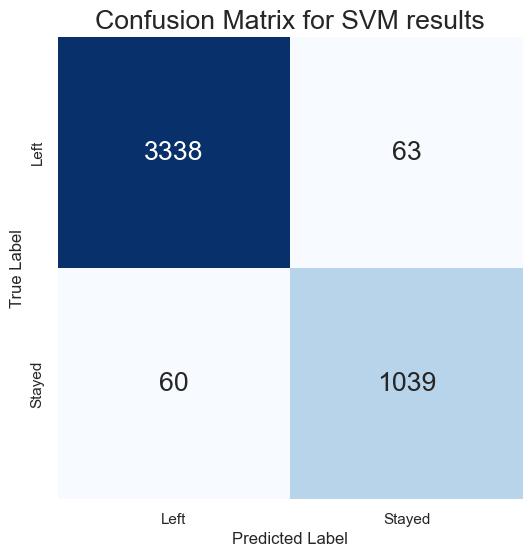

In [28]:
df_cm_svm = pd.DataFrame(cm_svm)
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(df_cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_names, yticklabels=label_names)
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Nearest Neighbors

In [29]:
df.head(5)

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_level_type,employee_type
0,0.53,157,3,0,1,0,sales,low,Low,Unburdened
1,0.86,262,6,0,1,0,sales,medium,High,Satisfactory
2,0.88,272,4,0,1,0,sales,medium,Low,Burdened
3,0.87,223,5,0,1,0,sales,low,High,Satisfactory
4,0.52,159,3,0,1,0,sales,low,Low,Unburdened


<Axes: xlabel='employee_type', ylabel='count'>

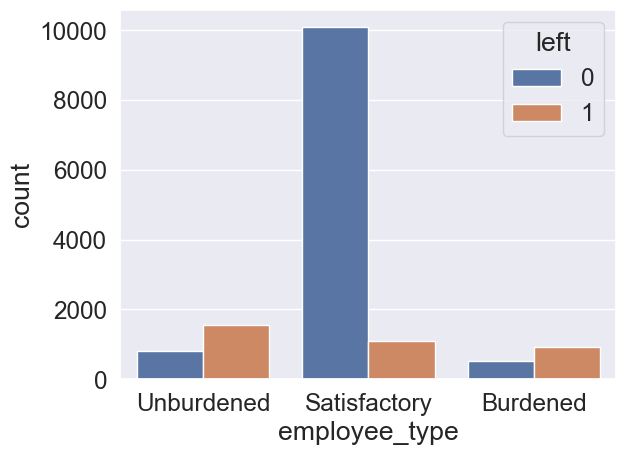

In [30]:
sns.countplot(x='employee_type', hue='left', data=df)

<Axes: xlabel='satisfaction_level_type', ylabel='count'>

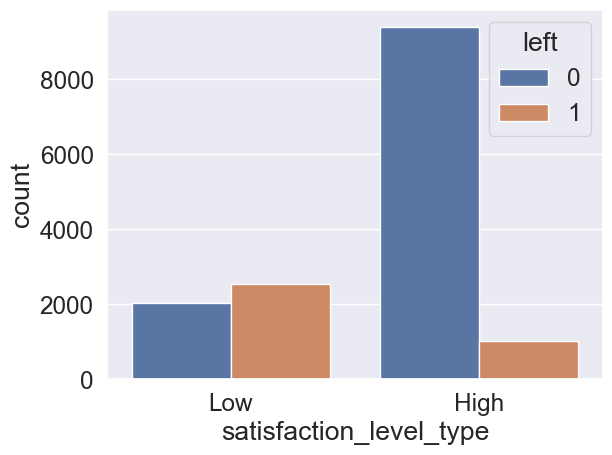

In [31]:
sns.countplot(x='satisfaction_level_type', hue='left', data=df)

<Axes: xlabel='dept', ylabel='count'>

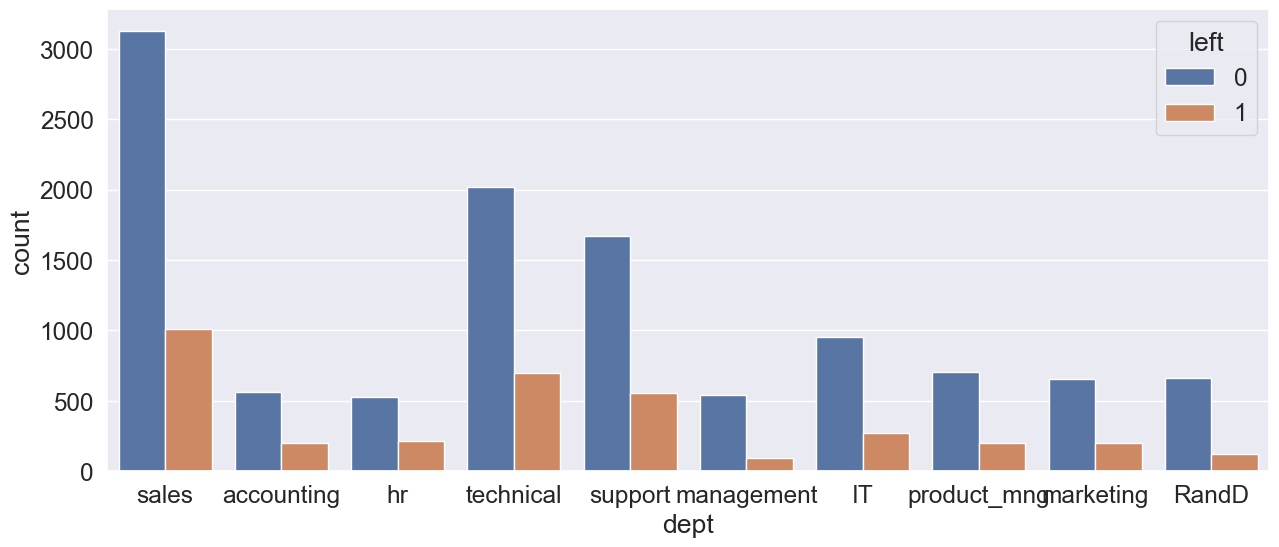

In [32]:
plt.subplots(figsize=(15,6))
sns.countplot(x='dept', hue='left', data=df)

<Axes: xlabel='salary', ylabel='count'>

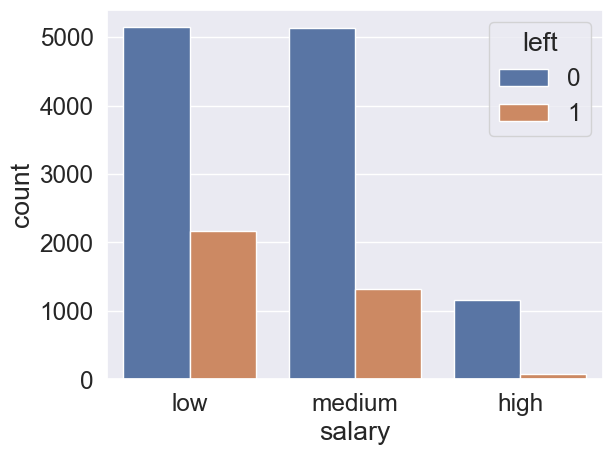

In [33]:
sns.countplot(x='salary', hue='left', data=df)

In [34]:
# Making instance and training the model
model_nn = KNeighborsClassifier(n_neighbors=1)
model_nn.fit(x_train_scaled, y_train)

# Get predictions
y_pred_nn = model_nn.predict(x_test_scaled)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [35]:
accuracy_nn = accuracy_score(y_test,y_pred_nn)
print(f"Accuracy: {accuracy_nn}")

# F1-Score 
f1_nn = f1_score(y_test, y_pred_nn)
print("F1-Score :", f1_nn)

# Recall
recall_nn = recall_score(y_test, y_pred_nn)
print("Recall:", recall_nn)

# Recall 
precision_nn = precision_score(y_test, y_pred_nn)
print("Precision:", precision_nn)

Accuracy: 0.9633333333333334
F1-Score : 0.9272807404142795
Recall: 0.9572338489535942
Precision: 0.8991452991452992


In [36]:
label_names = ['Left','Stayed']
cm_nn = confusion_matrix(y_test, y_pred_nn)
cm_nn

array([[3283,  118],
       [  47, 1052]], dtype=int64)

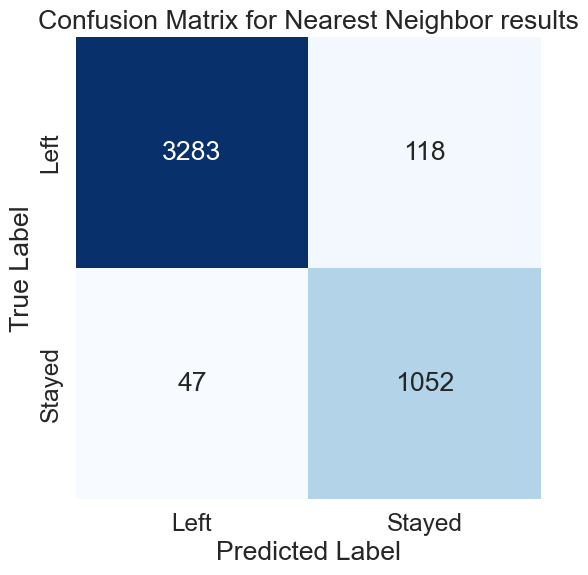

In [37]:
ig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_names, yticklabels=label_names)
title = "Confusion Matrix for Nearest Neighbor results"
plt.title(title)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## K-NN

In [38]:
# Making instance and training the model
model_knn = KNeighborsClassifier(n_neighbors=15)

start_time = time.time()
model_knn.fit(x_train_scaled, y_train)
end_time = time.time()
times.append(round(end_time - start_time,2))

# Get predictions
y_pred_knn = model_nn.predict(x_test_scaled)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print(f"Accuracy: {accuracy_knn}")
accuracies.append(round(accuracy_knn*100,2))

# F1-Score 
f1_knn = f1_score(y_test, y_pred_knn)
print("F1-Score :", f1_knn)

# Recall
recall_knn = recall_score(y_test, y_pred_knn)
print("Recall:", recall_knn)

# Recall 
precision_knn = precision_score(y_test, y_pred_knn)
print("Precision:", precision_knn)

Accuracy: 0.9633333333333334
F1-Score : 0.9272807404142795
Recall: 0.9572338489535942
Precision: 0.8991452991452992


In [40]:
label_names = ['Left','Stayed']
cm_knn = confusion_matrix(y_test, y_pred_nn)
cm_knn

array([[3283,  118],
       [  47, 1052]], dtype=int64)

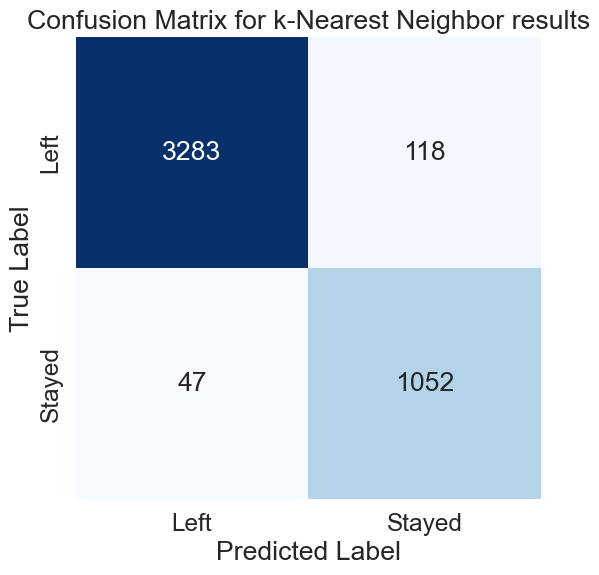

In [41]:
ig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_names, yticklabels=label_names)
title = "Confusion Matrix for k-Nearest Neighbor results"
plt.title(title)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Guassian Naive Baye's Algorithm

In [42]:
model_gnb = GaussianNB()

start_time = time.time()
model_gnb.fit(x_train_scaled, y_train)
end_time = time.time()
times.append(round(end_time - start_time,2))

y_pred_gnb = model_nn.predict(x_test_scaled)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
accuracy_gnb = accuracy_score(y_test,y_pred_gnb)
print(f"Accuracy: {accuracy_gnb}")
accuracies.append(round(accuracy_gnb*100,2))

# F1-Score 
f1_gnb = f1_score(y_test, y_pred_gnb)
print("F1-Score :", f1_gnb)

# Recall
recall_gnb = recall_score(y_test, y_pred_gnb)
print("Recall:", recall_gnb)

# Recall 
precision_gnb = precision_score(y_test, y_pred_gnb)
print("Precision:", precision_gnb)

Accuracy: 0.9633333333333334
F1-Score : 0.9272807404142795
Recall: 0.9572338489535942
Precision: 0.8991452991452992


In [44]:
label_names = ['Left','Stayed']
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[3283,  118],
       [  47, 1052]], dtype=int64)

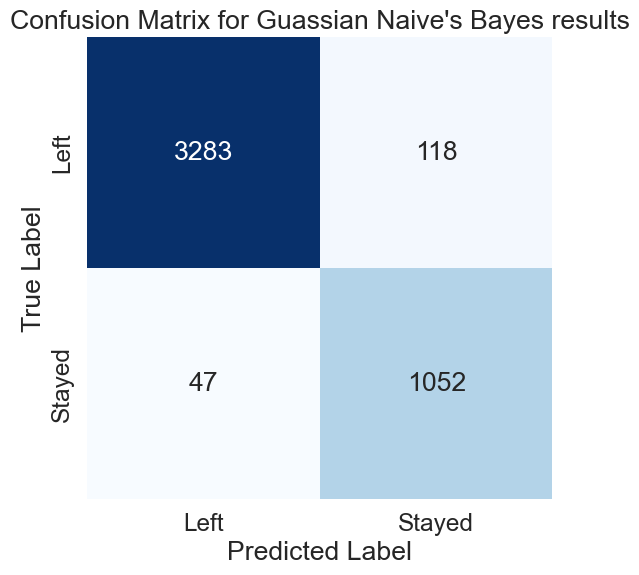

In [45]:
ig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_names, yticklabels=label_names)
title = "Confusion Matrix for Guassian Naive's Bayes results"
plt.title(title)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Perceptron Learning Rule

In [46]:
class Perceptron:
  def __init__(self, learning_rate=0.01, max_iter=100):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.weights = None  # Initialize weights as None

  def fit(self, X, y):
    """
    Train the Perceptron model on the given data X and target labels y.

    Args:
        X: A 2D numpy array of training features (shape: n_samples, n_features).
        y: A 1D numpy array of binary target labels (shape: n_samples,).
    """

    # Add a bias term (column of ones) to the feature matrix
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    self.weights = np.zeros(X.shape[1])  # Initialize weights with zeros

    # Training loop
    for _ in range(self.max_iter):
      errors = 0
      for i, x_i in enumerate(X):
        predicted = np.dot(self.weights, x_i)
        actual = y[i]

        # Update weights if prediction is wrong
        if predicted * actual <= 0:
          errors += 1
          self.weights += self.learning_rate * actual * x_i

      # Early stopping if no errors occur in an iteration
      if errors == 0:
        break

  def predict(self, X):
    """
    Predict class labels for new data points X.

    Args:
        X: A 2D numpy array of new data points (shape: n_samples, n_features).

    Returns:
        A 1D numpy array of predicted class labels (shape: n_samples,).
    """

    # Add a bias term to the feature matrix
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    predictions = np.sign(np.dot(X, self.weights))
    return predictions

In [47]:
x_test_scaled[0]

array([ 0.25241383, -0.24264687, -1.03449999, -0.41223218, -0.14965797,
       -0.29566171, -0.23579703, -0.23262946, -0.22919714, -0.21062969,
       -0.25094738, -0.24858011, -0.61378944,  2.38479793, -0.47262512,
       -0.30077452, -0.96932444,  1.14522346,  0.6612373 , -0.6612373 ,
       -0.32068074,  0.57680036, -0.43056949])

In [48]:
y_train

,left
5220,0
4819,0
9065,0
8696,0
5571,0
...,...
12119,1
8039,0
14147,0
6936,0


In [50]:
learning_rates =[1,0.1,0.01,0.001,0.0001]
accuracies_plr=[]
time_plr=[]
y_train_np = y_train.to_numpy()
j=1

start_time = time.time()


for i in learning_rates:
    print()
    model_perceptron = Perceptron(learning_rate=i, max_iter=1000)

    start_time = time.time()
    model_perceptron.fit(x_train_scaled, y_train_np)
    end_time = time.time()
    time_plr.append(round(end_time - start_time,2))

    y_pred_plr = model_perceptron.predict(x_test_scaled)

    accuracy_plr = accuracy_score(y_test,y_pred_plr)
    print(f"Accuracy_{j}: {accuracy_plr}")
    accuracies_plr.append(accuracy_plr)

    # F1-Score 
    f1_plr = f1_score(y_test, y_pred_plr)
    print(f"F1-Score_{j}: {f1_plr}")

    # Recall
    recall_plr = recall_score(y_test, y_pred_plr)
    print(f"Recall_{j}: {recall_plr}")

    # Recall 
    precision_plr = precision_score(y_test, y_pred_plr)
    print(f"Precision_{j}: {precision_plr}")
    print()
    j+=1

end_time = time.time()
times.append(round((end_time - start_time)/4,2))

accuracies.append(round(max(accuracies_plr)*100,2))


Accuracy_1: 0.24422222222222223
F1-Score_1: 0.3925701018038936
Recall_1: 1.0
Precision_1: 0.24422222222222223


Accuracy_2: 0.24422222222222223
F1-Score_2: 0.3925701018038936
Recall_2: 1.0
Precision_2: 0.24422222222222223


Accuracy_3: 0.24422222222222223
F1-Score_3: 0.3925701018038936
Recall_3: 1.0
Precision_3: 0.24422222222222223


Accuracy_4: 0.24422222222222223
F1-Score_4: 0.3925701018038936
Recall_4: 1.0
Precision_4: 0.24422222222222223


Accuracy_5: 0.24422222222222223
F1-Score_5: 0.3925701018038936
Recall_5: 1.0
Precision_5: 0.24422222222222223



In [51]:
cm_plr = confusion_matrix(y_test, y_pred_plr)
cm_plr

array([[   0, 3401],
       [   0, 1099]], dtype=int64)

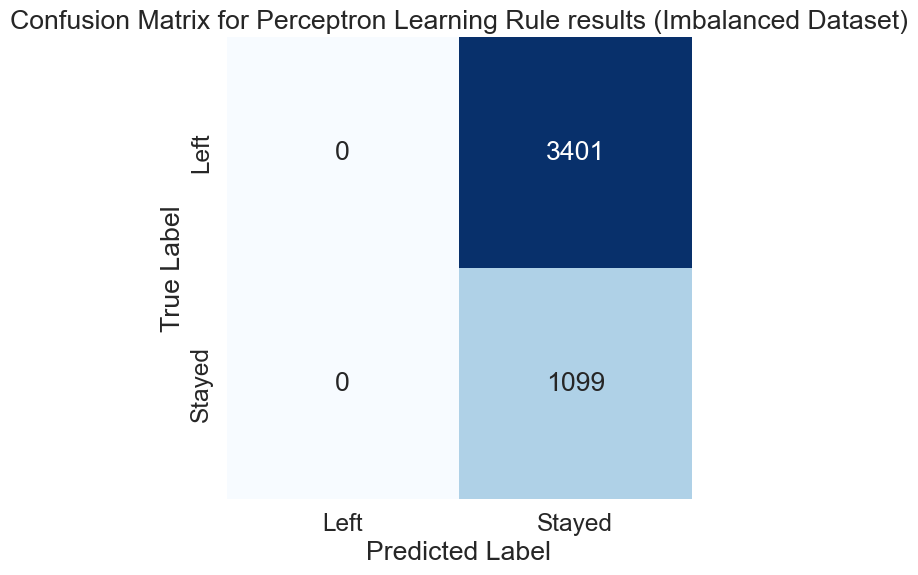

In [52]:
ig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm_plr, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_names, yticklabels=label_names)
title = "Confusion Matrix for Perceptron Learning Rule results (Imbalanced Dataset)"
plt.title(title)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Using balanced dataset

In [53]:
# df['left'].value_counts()

In [54]:
# # Separate data by target class
# stayed = df_copy[df_copy['left'] == 0]
# left = df_copy[df_copy['left'] == 1]

# # Undersample the majority class (Not Left)
# stayed_downsampled = resample(stayed, replace=False, n_samples=len(left), random_state=42)  

# # Combine the downsampled majority with the minority class
# balanced_df = pd.concat([left, stayed_downsampled], ignore_index=True)

In [55]:
# # Separate data by target class
# stayed = df_copy[df_copy['left'] == 0]
# left = df_copy[df_copy['left'] == 1]

# # Oversample the minority class (Left)
# left_upsampled = resample(left, replace=True, n_samples=len(stayed), random_state=42)  

# # Combine the oversampled minority with the majority class
# balanced_df = pd.concat([stayed, left_upsampled], ignore_index=True)

In [56]:
# balanced_df.head(2)

In [57]:
# balanced_df['left'].value_counts()

In [58]:
# X_balanced=balanced_df.drop(['left'], axis=1)
# Y_balanced=balanced_df[['left']]
# x_train_balanced,x_test_balanced,y_train_balanced,y_test_balanced=train_test_split(X_balanced,Y_balanced,test_size=0.30, random_state=100,shuffle=True)
# print(x_train_balanced.shape, y_train_balanced.shape)
# print(x_test_balanced.shape, y_test_balanced.shape)
# # Feature scaling
# scaler = StandardScaler()
# x_train_scaled_balanced = scaler.fit_transform(x_train_balanced)
# x_test_scaled_balanced = scaler.transform(x_test_balanced)

In [59]:
# from sklearn.metrics import f1_score

# def calculate_metrics(y_test_balanced, y_pred_plr):
#   """
#   Calculates precision, recall, and F1-score for valid predictions (0 or 1).

#   Args:
#       y_test_balanced (np.ndarray): True labels for the test set.
#       y_pred_plr (np.ndarray): Predicted labels by the Perceptron model.

#   Returns:
#       precision (float): Precision score for valid predictions.
#       recall (float): Recall score for valid predictions.
#       f1_score (float): F1-score for valid predictions.
#   """
    
#   # Filter valid predictions (0 or 1)
#   valid_indices = np.where((y_pred_plr == 0) | (y_pred_plr == 1))[0]
#   y_test_filtered = y_test_balanced.iloc[valid_indices]  # Might be empty
#   y_pred_filtered = y_pred_plr[valid_indices]  # Might be empty


#   if len(valid_indices) > 0:

#     # Calculate metrics using the filtered predictions
#     precision = precision_score(y_test_filtered, y_pred_filtered)
#     recall = recall_score(y_test_filtered, y_pred_filtered)
#     f1 = f1_score(y_test_filtered, y_pred_filtered)
#     return precision, recall, f1
  
#   else:
#     print("No valid predictions found. Skipping metrics calculation.")
#     return np.nan, np.nan, np.nan  # Or any placeholder values

In [60]:
# learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]
# y_train_balanced_np = y_train_balanced.to_numpy()
# j = 1

# for i in learning_rates:
#   print()
#   model_perceptron = Perceptron(learning_rate=i, max_iter=1000)

#   model_perceptron.fit(x_train_scaled_balanced, y_train_balanced_np)
#   y_pred_plr = model_perceptron.predict(x_test_scaled_balanced)

#   # Calculate metrics only for valid predictions
#   precision, recall, f1 = calculate_metrics(y_test_balanced, y_pred_plr)
#   accuracy = accuracy_score(y_test_balanced, y_pred_plr)
#   print(f"Accuracy_{j}: {accuracy}")
#   print(f"F1-Score_{j}: {f1}")
#   print(f"Recall_{j}: {recall}")
#   print(f"Precision_{j}: {precision}")
#   print()
#   j += 1

In [61]:
# label_names = ['Left','Stayed']
# cm_plr_balanced = confusion_matrix(y_test_balanced, y_pred_plr)
# cm_plr_balanced

In [62]:
# ig, ax = plt.subplots(figsize=(6,6))
# sns.set(font_scale=1.6)
# sns.heatmap(cm_plr_balanced, annot=True, fmt='d', cmap='Blues', cbar=False, 
#             xticklabels=label_names, yticklabels=label_names)
# title = "Confusion Matrix for Perceptron Learning Rule results (Balanced Dataset)"
# plt.title(title)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

## Random Forest

In [63]:
# Making instance and training the model
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(x_train_scaled, y_train)
# Get predictions
y_pred_rf=model_rf.predict(x_test_scaled)
y_pred_rf_prb = model_rf.predict_proba(x_test_scaled)[:, 1]
#Write the code to calculate
print(classification_report(y_test, y_pred_rf))

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.97      0.96      0.97      1099

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



In [64]:
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

# F1-Score 
f1_rf = f1_score(y_test, y_pred_rf)
print("F1-Score :", f1_rf)

# Recall
recall_rf = recall_score(y_test, y_pred_rf)
print("Recall:", recall_rf)

# Recall 
precision_rf = precision_score(y_test, y_pred_rf)
print("Precision:", precision_rf)

Accuracy: 0.9848888888888889
F1-Score : 0.9689213893967092
Recall: 0.9645131938125568
Precision: 0.9733700642791552


In [65]:
label_names = ['Left','Stayed']
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[3372,   29],
       [  39, 1060]], dtype=int64)

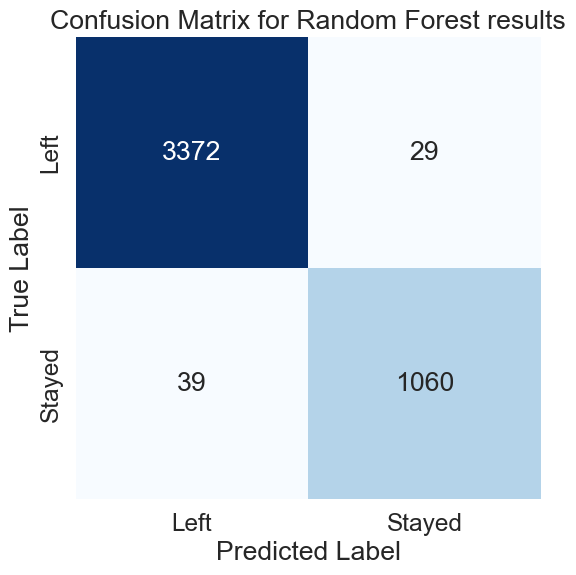

In [66]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=label_names, yticklabels=label_names)
title = "Confusion Matrix for Random Forest results"
plt.title(title)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Comparison

In [67]:
comparison_dict={"Algorithm":["NN","k-NN","Support Vector Machine","Random Forest","Perceptron Learning Rule","Gaussian Naive Bayes"],
                 "Accuracy":[accuracy_nn,accuracy_knn,accuracy_svm,accuracy_rf,accuracy_plr,accuracy_gnb],
                 "Precision":[precision_nn,precision_knn,precision_svm,precision_rf,precision_plr,precision_gnb],
                 "Recall":[recall_nn,recall_knn,recall_svm,recall_rf,recall_plr,recall_gnb],
                 "F1 Score":[f1_nn,f1_knn,f1_svm,f1_rf,f1_plr,f1_gnb]
                }

In [68]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy'], ascending=True)

,Algorithm,Accuracy,Precision,Recall,F1 Score
2,Support Vector Machine,0.972667,0.942831,0.945405,0.944116
0,NN,0.963333,0.899145,0.957234,0.927281
1,k-NN,0.963333,0.899145,0.957234,0.927281
5,Gaussian Naive Bayes,0.963333,0.899145,0.957234,0.927281
3,Random Forest,0.984889,0.973370,0.964513,0.968921
4,Perceptron Learning Rule,0.244222,0.244222,1.000000,0.392570


In [69]:
# Assuming 'comparison' is your DataFrame
algorithms = comparison['Algorithm'].tolist()  # List of algorithms

# Extract data for each metric
accuracy = comparison['Accuracy'].tolist()
precision = comparison['Precision'].tolist()
recall = comparison['Recall'].tolist()
f1_score = comparison['F1 Score'].tolist()

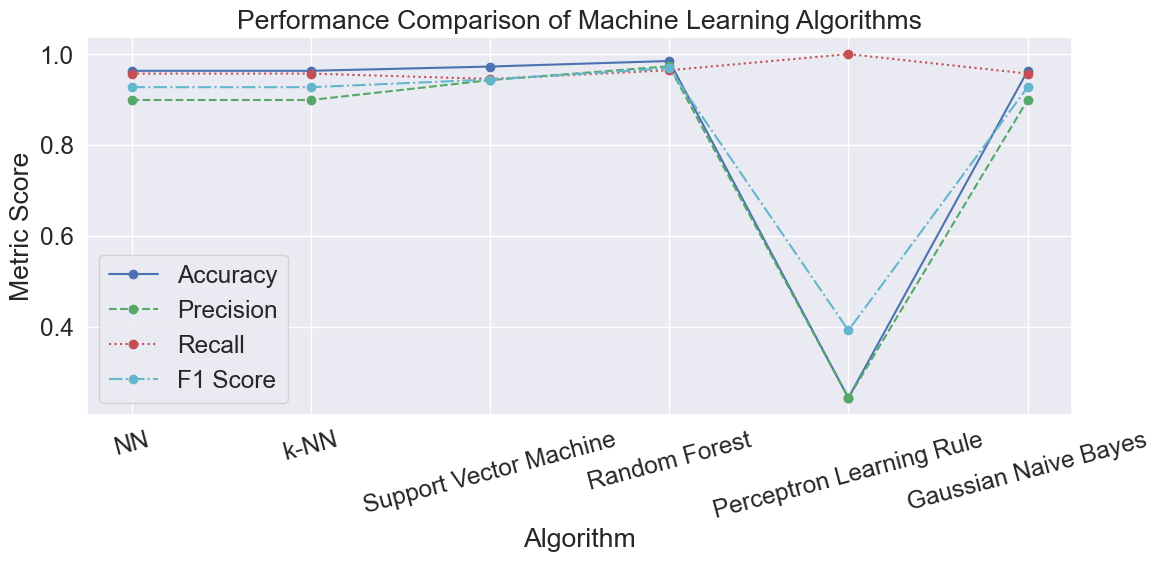

In [70]:
# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Define linestyles and colors for each metric
linestyles = ['-', '--', ':', '-.']
colors = ['b', 'g', 'r', 'c']  # Adjust colors as desired

# Access DataFrame column directly instead of eval
for metric, ls, color in zip(['Accuracy', 'Precision', 'Recall', 'F1 Score'], linestyles, colors):
    plt.plot(algorithms, comparison[metric], marker='o', linestyle=ls, label=metric, color=color)


plt.xlabel('Algorithm')
plt.ylabel('Metric Score')
plt.title('Performance Comparison of Machine Learning Algorithms')
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()  # Add legend to identify each metric line

# Customize plot (optional)
plt.tight_layout()

# Display the plot
plt.show()

In [71]:
def plot_bar_chart(x, y, title, xlabel, ylabel):
    plt.figure()
    bars = plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for bar, value in zip(bars, y):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, str(value), ha='center', va='bottom')
    plt.show()

In [72]:
MODELS = {
    "SVM" :  GridSearchCV(SVC(), param_grid, cv=5),
    "kNN": KNeighborsClassifier(n_neighbors=15),
    "GNB": GaussianNB(),
    "Perceptron": Perceptron(max_iter=1000)
}

In [78]:
print(times)
times = times[0:-1]
print(times)

[1352.98, 0.01, 0.03, 20.58, 22.69]
[1352.98, 0.01, 0.03, 20.58]


In [79]:
print(accuracies)

[97.27, 96.33, 96.33, 24.42]


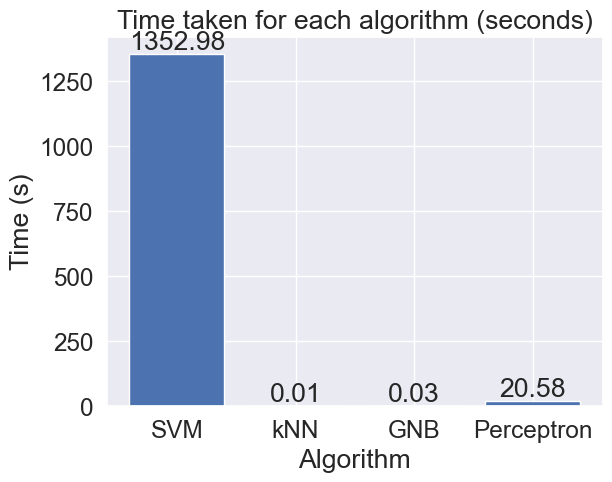

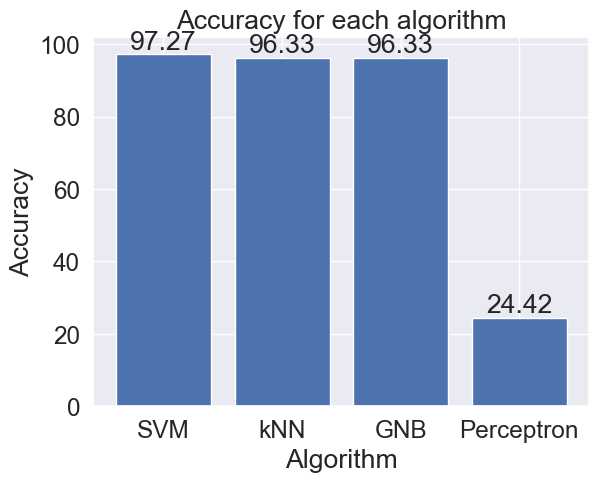

In [80]:
# Plotting
plot_bar_chart(list(MODELS.keys()), times, "Time taken for each algorithm (seconds)", "Algorithm", "Time (s)")
plot_bar_chart(list(MODELS.keys()), accuracies, "Accuracy for each algorithm", "Algorithm", "Accuracy")